TensorFlow 2.0還可以透過繼承`tf.keras.Model`來建構模型，這種建構class的方式就看個人是不是使用的習慣。

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.0.0'

接著下載MNIST資料集，在這之前先設置一個簡單的回傳資料的類別

In [3]:
class Data_Loader:
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()
        self.x_train = self.x_train = np.expand_dims(self.x_train / 255., -1)
        self.x_test = self.x_test = np.expand_dims(self.x_test / 255., -1)
    
    def batch_data(self, t_type='train', batch_size=32):        
        if t_type == 'train':
            index = np.random.randint(0, self.x_train.shape[0], batch_size)
            return self.x_train[index], self.y_train[index]
        elif t_type == 'test':
            index = np.random.randint(0, self.x_test.shape[0], batch_size)        
            return self.x_test[index], self.y_test[index]

簡單列印幾張照片來確認

In [4]:
data_loader = Data_Loader()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

隨機取得10個索引

In [6]:
_x, y = data_loader.batch_data(batch_size=10)

In [7]:
y

array([6, 0, 9, 3, 6, 7, 2, 5, 7, 8], dtype=uint8)

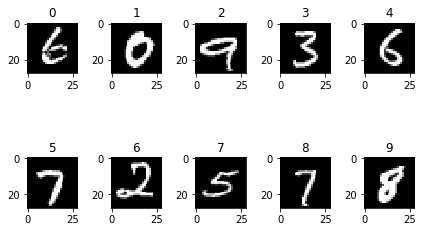

In [8]:
for idx in range(10):
    ax = plt.subplot(2, 5,idx+1)
    ax.imshow(_x[idx, :, :, 0], cmap='gray')
    plt.title(idx)    

plt.tight_layout()
plt.show()

指定硬體資源，相關可[參考](https://hackmd.io/@shaoeChen/ryWIV4vkL)

In [9]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')

In [10]:
gpus 

[PhysicalDevice(name=u'/physical_device:GPU:0', device_type=u'GPU'),
 PhysicalDevice(name=u'/physical_device:GPU:1', device_type=u'GPU')]

In [11]:
tf.config.experimental.set_visible_devices(devices=gpus[1], device_type='GPU')

In [12]:
tf.config.experimental.set_memory_growth(device=gpus[1], enable=True)

透過繼承`tf.keras.Model`來建構class

利用`tf.keras.Model`建構類別的時候要注意三點：
1. 初始化一定要繼承父類
2. 是`call`不是`__call__`
3. 不能使用`self.output`，因為這已經被用了

In [13]:
class LeNet5(tf.keras.Model):
    def __init__(self):
        # 一定要繼承父類的__init__才能使用父類相關的method與attribute
        super(LeNet5, self).__init__()
#         self.input = tf.keras.layers.InputLayer(input_shape=(28, 28, 1))
        self.conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), padding='valid', activation='tanh')
        self.maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='tanh')
        self.maxpool2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(120, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(84, activation='tanh')
        self.pred_y = tf.keras.layers.Dense(10, activation='softmax')
    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.pred_y(x)

確認模型

In [14]:
model = LeNet5()

編譯模型

因為我們並未將label轉one-hot encoder，因此必需使用`sparse_categorical_crossentropy`做為loss function

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [17]:
model.fit(data_loader.x_train, 
          data_loader.y_train, 
          batch_size=64,
          epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.6647 - accuracy: 0.8457
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2049 - accuracy: 0.9438
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1432 - accuracy: 0.9589
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1133 - accuracy: 0.9676
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0957 - accuracy: 0.9726
